# tSNE Clustering

In [3]:
# import statements
import sklearn 
from sklearn.manifold import TSNE
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from os.path import join
from skimage import color, io, morphology, img_as_ubyte, feature, exposure, filters, util
from skimage.filters import frangi, hessian
import scipy 
from scipy import ndimage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import cv2
import skimage
from skimage import exposure

## Some Functions
To process data and preprocess if needed.

In [4]:
# Mike's Swapping x,y
def swap_xy_detections(detections):
    out = detections.copy()
    temp = out[:,1].copy()
    out[:,1] = out[:,2]
    out[:,2] = temp
    
    return out

In [5]:
# Mike's

def preprocess(X):
    """
    Takes in a matrix of flattened images, one flattened image per row
    and pre-process them.
    """
    mean = np.mean(X, axis=0)
    standard_dev = np.std(X, axis=0)
    
    return (X-mean)/standard_dev
 

In [6]:
# Dani's Radial Profiling 

#The following function extracts histograms radially from the center of the image every number of pixels outwards.
#INPUT: Images of Fibers/No Fibers OUTPUT: Array (feature vector) of Means or STDS of the histograms of each image.

def radialProfiling(f, stat='mean'):
    nRings = np.min(f.shape) #maximum number of rings allowed 
    wRing = 2 #width of the ring

    nRings = np.rint(np.maximum(nRings/wRing,1))

    sx, sy = f.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    r = np.hypot(X - sx/2, Y - sy/2)
    rbin = (nRings* r/r.max()).astype(np.int)
    if (stat=='mean'):
        radialProfile = ndimage.mean(f, labels=rbin, index=np.arange(1, rbin.max() +1))
    elif(stat=='std'):
        radialProfile = ndimage.standard_deviation(f, labels=rbin, index=np.arange(1, rbin.max() +1))        
    return radialProfile

In [7]:
# Mike's
def detection_to_crop(image, detection, half_height=8, half_width=8):
    
    """
    Gets crops of image slice "image"
    Input: image- 2D cross-section
    Input2: detection- xy coordinates of markings in 2D cross section
    Input3,4: sizes of images *2 -1
    
    Return: Cropped image
    """
    detection_number, detection_x, detection_y = detection
    crop = image[int(detection_y)-half_height:int(detection_y)+half_height, 
                 int(detection_x)-half_width:int(detection_x)+half_width]
    
    return crop


In [8]:
def import_data(csv_path, image_path):
    """
    Input 1: path to csv file
    Input 2: path to image file
    Returns csv file and image to work with
    """
    # load csv
    coords = np.genfromtxt(csv_path, delimiter = ",", skip_header = 1)
    # load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    return coords, image
    

In [9]:
# make it a function, dude
def crops_array(det, image):
    """
    Creates matrix of crops/detections made from 'image'
    Input 1: det is loaded csv file
    Input 2: image is loaded cross section 
    Returns array of cropped images
    """
    crops_list = []
    for detection in det:
        crops_list.append(detection_to_crop(image, detection).flatten())
    crops_array = np.array(crops_list)
    
    return crops_array, crops_list
        

## Import Data
Clean up, if needed.

In [10]:
# Input appropriate paths
file_name1 = "Data/Silvia-600-crop92-Results.csv"
file_name2 = "Data/Silvia-600-crop171-Results.csv"
im_1 = "Data/_19p6/cropped/crop92.tif"
im_2 = "Data/_19p6/cropped/crop171.tif"

In [11]:
detections, image = import_data(file_name1, im_1)
crops, crops_list = crops_array(detections, image)

In [12]:
detections2, image2 = import_data(file_name2, im_2)
crops2, crops_list2 = crops_array(detections2, image2)

In [13]:
# putting list together
crops_1200 = crops_list + crops_list2
len(crops_1200)

1200

## t-SNE Cluster Time


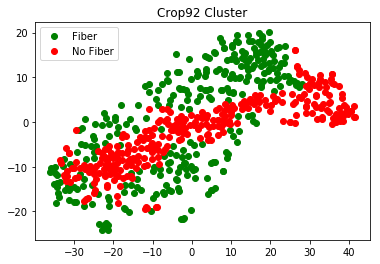

In [14]:
tsne_result1 = TSNE(n_components=2).fit_transform(crops)
plt.plot(tsne_result1[:len(crops)//2,0], tsne_result1[:len(crops)//2,1], 'go', label= "Fiber")
plt.plot(tsne_result1[len(crops)//2:,0], tsne_result1[len(crops)//2:, 1], 'ro', label = "No Fiber")
plt.title("Crop92 Cluster")
plt.legend()
plt.savefig("crop92-tSNE")

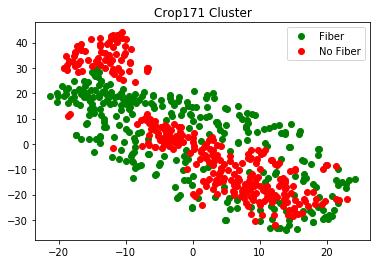

In [15]:
tsne_result2 = TSNE(n_components=2).fit_transform(crops2)
plt.plot(tsne_result2[:len(crops2)//2,0], tsne_result2[:len(crops2)//2,1], 'go', label= "Fiber")
plt.plot(tsne_result2[len(crops2)//2:,0], tsne_result2[len(crops2)//2:, 1], 'ro', label = "No Fiber")
plt.title("Crop171 Cluster")
plt.legend()
plt.savefig('crop171-tSNE')

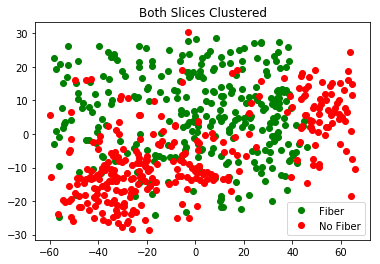

In [16]:
tsne_result3 = TSNE(n_components=2).fit_transform(crops_1200)
plt.plot(tsne_result3[:300,0], tsne_result3[600:900,1], 'go', label= "Fiber")
plt.plot(tsne_result3[900:1200,0], tsne_result3[300:600, 1], 'ro', label = "No Fiber")
plt.title("Both Slices Clustered")
plt.legend()
plt.savefig('crop171-crop92-tSNE')

In [ ]:
len(tsne_result)